# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
churn_df = pd.read_excel("Churn_Dataset.xlsx")

churn_df.head()

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
0,1001,56.0,1123.689075,NaN,Ontario,Divorced,Life,4.385453,1,0
1,1001,56.0,1123.689075,NaN,Alberta,Divorced,Life,4.385453,1,0
2,1001,56.0,1123.689075,NaN,Ontario,Divorced,Life,4.385453,1,0
3,1001,56.0,1123.689075,14.0,Alberta,Divorced,Life,4.385453,1,0
4,1001,56.0,1123.689075,14.0,Manitoba,Divorced,Life,4.385453,1,0


# Data Exploration & Visualization

In [64]:
churn_df.info()
churn_df.describe().round(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            6000 non-null   int64  
 1   Age                   5407 non-null   float64
 2   AnnualPremium         5409 non-null   float64
 3   Tenure                5400 non-null   float64
 4   Province              6000 non-null   object 
 5   MaritalStatus         6000 non-null   object 
 6   PolicyType            6000 non-null   object 
 7   ClaimFrequency        6000 non-null   float64
 8   CustomerSatisfaction  6000 non-null   int64  
 9   Churn                 6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


,CustomerID,Age,AnnualPremium,Tenure,ClaimFrequency,CustomerSatisfaction,Churn
count,6000.000,5407.000,5409.000,5400.000,6000.000,6000.000,6000.000
mean,1607.227,49.859,1174.458,15.199,2.497,5.622,0.319
std,347.830,18.496,629.394,8.404,1.426,2.837,0.466
min,1001.000,13.000,0.000,1.000,0.000,1.000,0.000
25%,1303.000,34.000,702.680,8.000,1.255,3.000,0.000
50%,1617.500,50.000,1166.018,15.000,2.501,6.000,0.000
75%,1908.250,66.000,1592.387,22.000,3.750,8.000,1.000
max,2200.000,125.000,9692.709,29.000,4.998,10.000,1.000


This first initial look can present some obvious discrepancies in our data:

- Age
  - The max age is listed as 125, which could be possible on the island of centurions but highly unlikely. This could have been due to data entry error.
  - On the other end, the min age is listed as 13 which is not old enough to open an account presuming we are somewhere that the age of adulthood is 18.
- Annual premium 
  - Has a mean of 1174 and a standard deviation of 629 so the max value being 9692 is really high compared to the rest of the samples.
  - The minimum value being 0 is odd as well as usually people need to pay for insurance

### Outliers

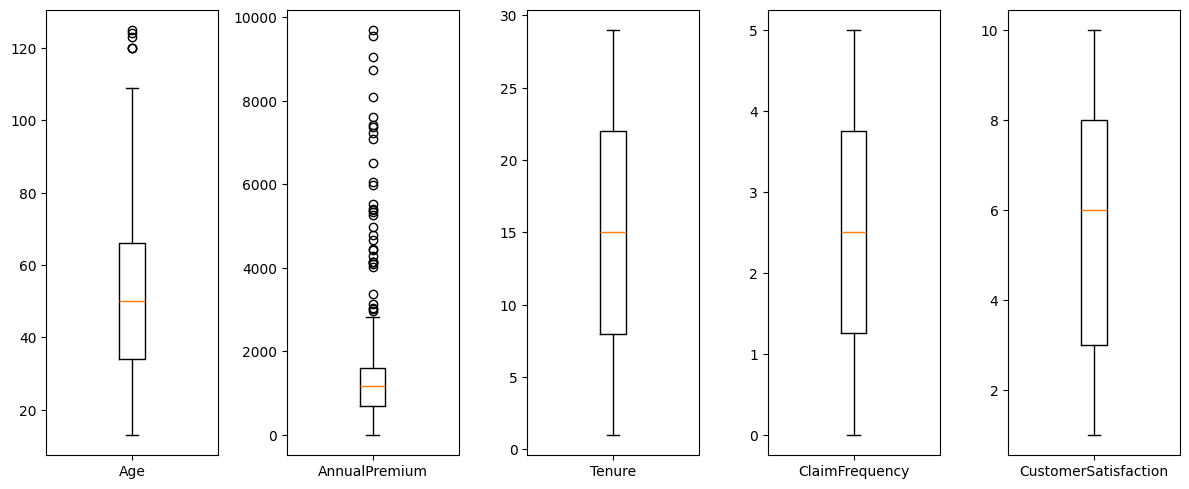

In [104]:
# Box plot for visualization
numerical_features = ['Age', 'AnnualPremium', 'Tenure', 'ClaimFrequency', 'CustomerSatisfaction']

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,5))
axs = axs.flatten()

for col, ax in zip(numerical_features, axs.ravel()):
    ax.boxplot(churn_df[col].dropna(), tick_labels=[col])

fig.tight_layout()
plt.show()

#### Age

In [105]:
churn_df[(churn_df['AnnualPremium'] > 4000)]

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
245,1049,NaN,8734.489412,23.0,Ontario,Divorced,Home,4.989104,9,1
521,1103,53.0,5339.866677,25.0,Ontario,Divorced,Life,2.246749,6,0
673,1133,42.0,4023.556961,9.0,Manitoba,Married,Auto,3.704520,3,1
820,1167,52.0,9551.281197,3.0,Manitoba,Married,Home,2.502006,5,1
858,1175,54.0,4133.086741,21.0,Alberta,Divorced,Life,2.082522,6,0
1058,1215,39.0,4143.862312,21.0,Ontario,Divorced,Home,2.595161,10,1
1080,1219,62.0,4983.406765,13.0,Alberta,Single,Auto,3.864607,2,0
1401,1284,66.0,7078.123893,21.0,British Columbia,Married,Home,0.671374,8,0
1702,1348,45.0,6496.496524,6.0,Ontario,Single,Home,2.143510,9,1
1749,1359,33.0,7617.445414,10.0,Quebec,Married,Home,1.858620,9,1


In [106]:
outlier_age_low_customer_ids = churn_df[(churn_df['Age'] < 18)]['CustomerID'].to_list()
outlier_age_low_customer_ids

[1584]

In [107]:
# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
outlier_age_high_customer_ids = churn_df[(churn_df['Age'] >= 105)]['CustomerID'].to_list()
outlier_age_high_customer_ids


[1040, 1065, 1113, 1162, 1322, 1330, 1660, 1671, 2041]

In [108]:
churn_df[churn_df['CustomerID'].isin(outlier_age_low_customer_ids + outlier_age_high_customer_ids)]

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
199,1040,76.0,1329.817193,21.0,Quebec,Married,Home,3.462662,4,0
200,1040,107.0,1329.817193,21.0,Ontario,Married,Home,3.462662,4,0
201,1040,76.0,1329.817193,21.0,Ontario,Married,Home,3.462662,4,0
202,1040,76.0,1329.817193,21.0,Manitoba,Married,Home,3.462662,4,0
323,1065,77.0,NaN,12.0,Quebec,Divorced,Auto,2.438139,4,0
324,1065,77.0,775.964459,NaN,Alberta,Divorced,Auto,2.438139,4,0
325,1065,NaN,775.964459,12.0,Quebec,Divorced,Auto,2.438139,4,0
326,1065,125.0,775.964459,12.0,Manitoba,Divorced,Auto,2.438139,4,0
327,1065,77.0,775.964459,12.0,Manitoba,Divorced,Auto,2.438139,4,0
328,1065,77.0,775.964459,12.0,British Columbia,Divorced,Auto,2.438139,4,0


We can see that all the records that have an age over 105 has duplicate records with more realistic ages.

In [109]:
# Identify the valid ages
# This assigns the minimum age to each index grouped by their CustomerID
valid_ages_min = churn_df[churn_df['CustomerID'].isin(outlier_age_high_customer_ids)].groupby('CustomerID')['Age'].transform('min')

In [110]:
# This assigns the maximum age to each index grouped by their CustomerID
valid_ages_max = churn_df[churn_df['CustomerID'].isin(outlier_age_low_customer_ids)].groupby('CustomerID')['Age'].transform('max')

In [111]:
valid_ages = pd.concat([valid_ages_min, valid_ages_max])
valid_ages[:10]

199    76.0
200    76.0
201    76.0
202    76.0
323    77.0
324    77.0
325    77.0
326    77.0
327    77.0
328    77.0
Name: Age, dtype: float64

In [112]:
# Replace the ages above 105 or below 18 with their valid duplicate
# row.name represents index https://stackoverflow.com/questions/26658240/getting-the-index-of-a-row-in-a-pandas-apply-function
churn_df['Age'] = churn_df.apply(lambda row: valid_ages[row.name] if row['Age'] >= 105 or row['Age'] < 18 else row['Age'], axis=1)

In [113]:
churn_df.Age.describe()

count    5407.000000
mean       49.791936
std        18.312295
min        18.000000
25%        34.000000
50%        50.000000
75%        66.000000
max       101.000000
Name: Age, dtype: float64

#### Annual Premium

This one is more tricky because we do not know if these are **actually** outliers or if there's some outside factors that influence these values to be out of the normal sometimes.
I would have to consult with the content providers about whether these are valid premiums.

For now, I do not think it would be correct to alter them.

### Normality
We check continuous variables for normality

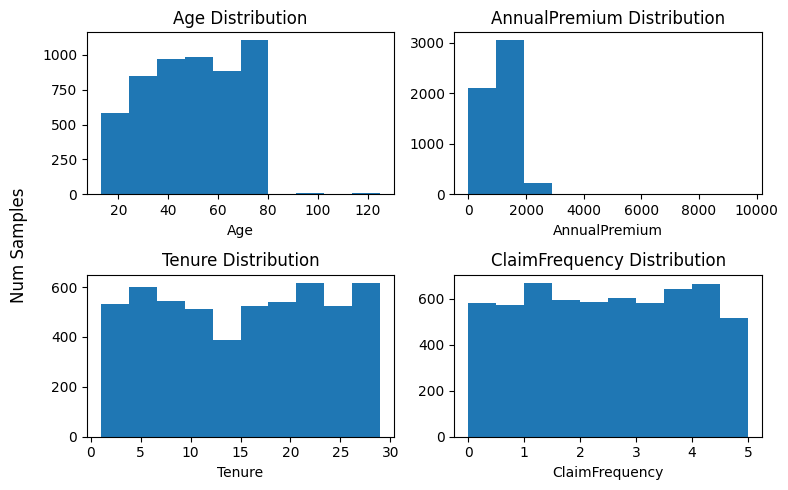

In [97]:
continuous_features = ["Age", "AnnualPremium", "Tenure","ClaimFrequency"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,5))
fig.supylabel('Num Samples')
axs = axs.flatten()

for col, ax in zip(continuous_features, axs.ravel()):
    ax.hist(churn_df[col])
    ax.set_xlabel(col)
    ax.title.set_text(f'{col} Distribution')

plt.tight_layout()

Our continuous features are NOT normally distributed

### Correlation
We can take an initial look at how the numerical values correlate to eachother for an idea of what features could prove the most useful for predicting churn.

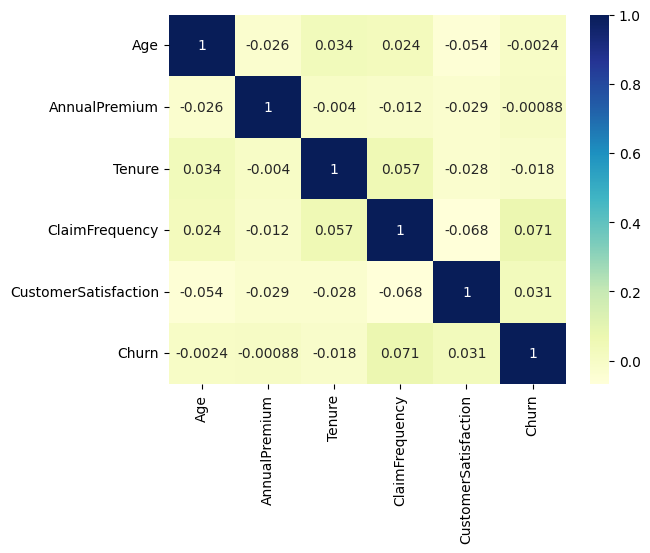

In [ ]:
churn_df2 = pd.read_excel("Churn_Dataset.xlsx")
corr_matrix = churn_df2[["Age", "AnnualPremium", "Tenure","ClaimFrequency","CustomerSatisfaction", "Churn"]].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

From our data, I see that there are no features here that could be considered strongly associated:

- -0.2 - +0.2 values = Very weak + or no association
- 0.2 - 0.4 = Weak + association

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html

## Data Cleaning

We'll start with cleaning the data as it will make sure we don't have any issues with later analysis such as NaN values.

### Missing Data

Two options here:

- Drop records with missing data
- Imput records with missing data

I should mention the 3rd option here of Predictive Imputation where you would build a separate model for the prediction of missing data. This is useful if you believe there are strong relationships between your features. I do not feel this option is necessary worth the time to complete this has, however.

In [114]:
print(churn_df.isnull().any().any())
print(churn_df.isna().any().any())

True
True


#### Exploration

In [72]:
# How much missing data and where?
missing_data = churn_df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (churn_df.isnull().sum() / len(churn_df)) * 100

# Print missing data summary
print(pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage}))

                      Missing Values  Percentage
CustomerID                         0    0.000000
Age                              593    9.883333
AnnualPremium                    591    9.850000
Tenure                           600   10.000000
Province                           0    0.000000
MaritalStatus                      0    0.000000
PolicyType                         0    0.000000
ClaimFrequency                     0    0.000000
CustomerSatisfaction               0    0.000000
Churn                              0    0.000000


Some sources (https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/data-cleaning-and-imputation?ex=1#:~:text=One%20rule%20of%20thumb%20is,mode%2C%20depending%20on%20the%20context.) suggest that a rule of thumb is to only drop rows with missing values if they make up less than 5% of the data.

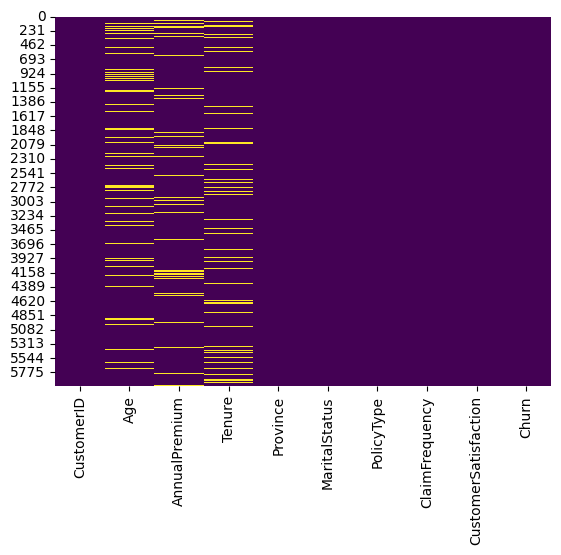

In [53]:
# Plotting the missing values for better visual indication of trends
sns.heatmap(churn_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [54]:
# Create a DataFrame of missingness flags for each feature
missing_flags = churn_df.isnull().astype(int)

# Add the Churn column to the missing_flags DataFrame for correlation analysis
missing_flags['Churn'] = churn_df['Churn']

# Calculate Pearson correlation between missing flags and Churn
correlation_matrix = missing_flags.corr()

# Extract the correlation of each feature's missingness with Churn
missing_churn_corr = correlation_matrix['Churn'].drop('Churn')

print(missing_churn_corr)

CustomerID                   NaN
Age                     0.016695
AnnualPremium           0.006684
Tenure                  0.002027
Province                     NaN
MaritalStatus                NaN
PolicyType                   NaN
ClaimFrequency               NaN
CustomerSatisfaction         NaN
Name: Churn, dtype: float64


Thankfully it looks like the missing columns have no strong association with the target.

#### Option 1. Drop Records with Missing Data

In [ ]:
churn_df.dropna(inplace=True)
print(len(churn_df))
churn_df.isnull().any().any()
churn_df.isna().any().any()

3186


#### Option 2. Imputing missing values

There are a few strategies for imputing values based on their type.

For numerical values we can use the mean, median or mode of all the values in that column.

In [119]:
from sklearn.impute import SimpleImputer

# Impute numerical cols
num_cols = ['Age', 'AnnualPremium', 'Tenure', 'ClaimFrequency', 'CustomerSatisfaction']
imputer = SimpleImputer(strategy='most_frequent')
churn_df[num_cols] = imputer.fit_transform(churn_df[num_cols])

churn_df

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
0,1001,56.0,1123.689075,28.0,Ontario,Divorced,Life,4.385453,1.0,0
1,1001,56.0,1123.689075,28.0,Alberta,Divorced,Life,4.385453,1.0,0
3,1001,56.0,1123.689075,14.0,Alberta,Divorced,Life,4.385453,1.0,0
4,1001,56.0,1123.689075,14.0,Manitoba,Divorced,Life,4.385453,1.0,0
5,1001,56.0,1123.689075,14.0,British Columbia,Divorced,Life,4.385453,1.0,0
...,...,...,...,...,...,...,...,...,...,...
5991,2200,79.0,1345.522046,9.0,Alberta,Married,Life,3.753848,10.0,0
5992,2200,73.0,1345.522046,9.0,British Columbia,Married,Life,3.753848,10.0,0
5995,2200,73.0,1345.522046,9.0,Alberta,Married,Life,3.753848,10.0,0
5996,2200,79.0,1345.522046,9.0,Quebec,Married,Life,3.753848,10.0,0


Since none of our categorical values are missing, we don't need to impute them here but we could by using the most frequently appearing value.

In [120]:
print(churn_df.isnull().any().any())
print(churn_df.isna().any().any())

False
False


### Duplicate Data

#### Exact duplicates

Exact duplicates have the exact same value in every column which, depending on your dataset, can be easily identified for removal.

Since our dataset is depending on the information on the information of each individual customer, we do not want duplicate entries that would add more consideration to a single customers features.

In [121]:
duplicate_rows = churn_df[churn_df.duplicated(keep=False)] # Do not keep the non duplicate rows

# The column that really matters here to identify duplicates is the ID
duplicate_rows.sort_values(by=['CustomerID'])

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
166,1033,75.0,516.886515,28.0,Quebec,Divorced,Home,2.552162,6.0,0
168,1033,75.0,516.886515,28.0,Quebec,Divorced,Home,2.552162,6.0,0
227,1046,79.0,617.163941,21.0,Ontario,Single,Auto,1.053525,4.0,0
231,1046,79.0,617.163941,21.0,Ontario,Single,Auto,1.053525,4.0,0
1000,1204,56.0,888.788190,28.0,Alberta,Divorced,Auto,1.686728,3.0,1
1002,1204,56.0,888.788190,28.0,Alberta,Divorced,Auto,1.686728,3.0,1
1084,1220,79.0,602.661144,4.0,British Columbia,Married,Life,2.606480,2.0,0
1086,1220,79.0,602.661144,4.0,British Columbia,Married,Life,2.606480,2.0,0
1147,1234,45.0,0.000000,28.0,Quebec,Divorced,Life,0.006768,10.0,0
1150,1234,45.0,0.000000,28.0,Quebec,Divorced,Life,0.006768,10.0,0


We can see above that 2256 rows are identified as exact duplicates of eachother, meaning half of those rows can be removed. 
We will remove 2256 / 2 = 1253 rows.

Our dataset started with 6000 rows, so we'll expect to have 6000 - 1253 = 4747 rows remaining.

In [122]:
# Remove the exact duplicate rows
churn_df.drop_duplicates(inplace=True)

print(len(churn_df))

4721


#### Near/Fuzzy duplicates
In some cases, every column value is the same between the duplicate rows so those ones should be easy removal.

However, it appears there are cases where a customer (identified by their ID) appears many times with the column values differing just slightly, often by location.

In these cases, I feel that I would need to consult the data provider as to why they have conflicting records for the same customer. I believe in an ideal scenario, a customer record would be updated if there was a location change. 

I could see a scenario where we would want to keep a record of all their previous locations, but in that case the older records should likely be marked as such. Or at least have provided a date of entry so we could choose to keep the most recent *complete* record.

Either way, in our case where we are trying to predict the chance of churn for a person, a customer should only make up one sample each.

In [123]:
# Selecting rows with just Customer ID column duplicated
near_duplicates = churn_df.loc[churn_df.duplicated(subset=['CustomerID'])].sort_values(by=['CustomerID'])
near_duplicates

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
1,1001,56.0,1123.689075,28.0,Alberta,Divorced,Life,4.385453,1.0,0
3,1001,56.0,1123.689075,14.0,Alberta,Divorced,Life,4.385453,1.0,0
6,1001,79.0,0.000000,14.0,Manitoba,Divorced,Life,4.385453,1.0,0
5,1001,56.0,1123.689075,14.0,British Columbia,Divorced,Life,4.385453,1.0,0
4,1001,56.0,1123.689075,14.0,Manitoba,Divorced,Life,4.385453,1.0,0
...,...,...,...,...,...,...,...,...,...,...
5989,2199,64.0,0.000000,20.0,Alberta,Single,Home,1.960468,9.0,1
5995,2200,73.0,1345.522046,9.0,Alberta,Married,Life,3.753848,10.0,0
5992,2200,73.0,1345.522046,9.0,British Columbia,Married,Life,3.753848,10.0,0
5996,2200,79.0,1345.522046,9.0,Quebec,Married,Life,3.753848,10.0,0


In [124]:
# Identify all the near duplicate customer ID's
near_duplicate_ids = near_duplicates['CustomerID'].unique()
print(near_duplicate_ids)
print(len(near_duplicate_ids))

[1001 1002 1003 ... 2198 2199 2200]
1140


In [125]:
# Example of multi differing entries for one customer
# "Near" duplicates
churn_df.loc[churn_df['CustomerID'] == 2200]

,CustomerID,Age,AnnualPremium,Tenure,Province,MaritalStatus,PolicyType,ClaimFrequency,CustomerSatisfaction,Churn
5991,2200,79.0,1345.522046,9.0,Alberta,Married,Life,3.753848,10.0,0
5992,2200,73.0,1345.522046,9.0,British Columbia,Married,Life,3.753848,10.0,0
5995,2200,73.0,1345.522046,9.0,Alberta,Married,Life,3.753848,10.0,0
5996,2200,79.0,1345.522046,9.0,Quebec,Married,Life,3.753848,10.0,0
5998,2200,73.0,1345.522046,28.0,British Columbia,Married,Life,3.753848,10.0,0


We can check which columns these records seem to differ from eachother below.

In [126]:
non_id_columns = churn_df.columns.difference(['CustomerID']).to_list()
zero_list = [0] * len(non_id_columns)

differing_columns = {non_id_columns[i]: zero_list[i] for i in range(len(non_id_columns))}

for id in near_duplicate_ids:
    subset = churn_df[churn_df['CustomerID'] == id]

    for col in subset.columns.difference(['CustomerID']):
        # Drop rows where the column value is NaN, that doesn't help this investigation
        non_nan_values = subset[col].dropna()

        if non_nan_values.nunique() > 1:
            differing_columns[col] += 1

print("Count of columns that differ for near duplicate records")
print({k:v for (k,v) in differing_columns.items() if v > 0})

Count of columns that differ for near duplicate records
{'Age': 484, 'AnnualPremium': 503, 'CustomerSatisfaction': 51, 'Province': 1124, 'Tenure': 452}


## Normalization / Scaling / Standardization

Standardization preferred if there's outliers.
Mitigate the impact of data bias on predictions

Tree based models are less affected by scaling.
Other models will need features to be normalized for best performance such as Logistic regression.

In [84]:
#numerical_features = ["Age", "AnnualPremium", "Tenure","ClaimFrequency", "CustomerSatisfaction"] # Not sure yet if I need satisfaction scaled
numerical_features = ["Age", "AnnualPremium", "Tenure","ClaimFrequency"]

### Standardization (Not in this case)

Post discovery: This method assumes normally distributed data which discovered is not our case.

In [17]:
X1 = churn_df[numerical_features]
X1.head()

,Age,AnnualPremium,Tenure,ClaimFrequency
3,56.0,1123.689075,14.0,4.385453
4,56.0,1123.689075,14.0,4.385453
5,56.0,1123.689075,14.0,4.385453
7,69.0,1351.033112,9.0,4.720210
8,69.0,1351.033112,9.0,4.720210


A mean if 0 and a standard deviation of 1

This method assumes the data set fllows a normal distribution, which we not from above, is not the case.

In [18]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X1 = standard_scaler.fit_transform(X1)
# Have to turn back into a dataframe
X1 = pd.DataFrame(X1, columns = numerical_features, index=churn_df.index)

X1.head()

,Age,AnnualPremium,Tenure,ClaimFrequency
3,0.315231,-0.084953,-0.139793,1.315238
4,0.315231,-0.084953,-0.139793,1.315238
5,0.315231,-0.084953,-0.139793,1.315238
7,1.014398,0.259296,-0.737461,1.549254
8,1.014398,0.259296,-0.737461,1.549254


In [19]:
X1.describe().round(3)

,Age,AnnualPremium,Tenure,ClaimFrequency
count,3186.000,3186.000,3186.000,3186.000
mean,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-1.997,-1.786,-1.694,-1.750
25%,-0.814,-0.725,-0.857,-0.871
50%,-0.007,-0.029,-0.020,0.002
75%,0.853,0.625,0.816,0.872
max,4.026,12.890,1.653,1.743


### Normalization (Will use)

Scaled to 0-1

In [127]:
from sklearn.preprocessing import MinMaxScaler

X2 = churn_df[numerical_features]
# Default feature range is (0,1) but this can be changed
min_max_scaler = MinMaxScaler()

X2 = min_max_scaler.fit_transform(X2)
# Need to specify the same index values as the data in order to concat later without introducing nan values
X2 = pd.DataFrame(X2, columns = numerical_features, index=churn_df.index)

X2.head()

,Age,AnnualPremium,Tenure,ClaimFrequency,CustomerSatisfaction
0,0.457831,0.115931,0.964286,0.877477,0.0
1,0.457831,0.115931,0.964286,0.877477,0.0
3,0.457831,0.115931,0.464286,0.877477,0.0
4,0.457831,0.115931,0.464286,0.877477,0.0
5,0.457831,0.115931,0.464286,0.877477,0.0


In [128]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4721 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4721 non-null   float64
 1   AnnualPremium         4721 non-null   float64
 2   Tenure                4721 non-null   float64
 3   ClaimFrequency        4721 non-null   float64
 4   CustomerSatisfaction  4721 non-null   float64
dtypes: float64(5)
memory usage: 221.3 KB


In [129]:
X2.describe().round(3)

,Age,AnnualPremium,Tenure,ClaimFrequency,CustomerSatisfaction
count,4721.000,4721.000,4721.000,4721.000,4721.000
mean,0.427,0.108,0.563,0.499,0.512
std,0.236,0.076,0.318,0.286,0.315
min,0.000,0.000,0.000,0.000,0.000
25%,0.229,0.056,0.286,0.251,0.222
50%,0.434,0.108,0.571,0.500,0.556
75%,0.651,0.157,0.857,0.750,0.778
max,1.000,1.000,1.000,1.000,1.000


In [130]:
# Drop the old continuous values
churn_df.drop(columns=numerical_features, inplace=True)
# Add in the normalized ones
churn_df = pd.concat([churn_df, X2], axis=1)

churn_df.head()

,CustomerID,Province,MaritalStatus,PolicyType,Churn,Age,AnnualPremium,Tenure,ClaimFrequency,CustomerSatisfaction
0,1001,Ontario,Divorced,Life,0,0.457831,0.115931,0.964286,0.877477,0.0
1,1001,Alberta,Divorced,Life,0,0.457831,0.115931,0.964286,0.877477,0.0
3,1001,Alberta,Divorced,Life,0,0.457831,0.115931,0.464286,0.877477,0.0
4,1001,Manitoba,Divorced,Life,0,0.457831,0.115931,0.464286,0.877477,0.0
5,1001,British Columbia,Divorced,Life,0,0.457831,0.115931,0.464286,0.877477,0.0


## Dealing with Categorical data

One-hot encoding

In [131]:
# Get the categorical data types
categorical_cols = churn_df.select_dtypes(include=[object]).columns.to_list()
print(categorical_cols)

# Checking the unique categories
for col in categorical_cols:
    print(col, ':', churn_df[col].unique())

['Province', 'MaritalStatus', 'PolicyType']
Province : ['Ontario' 'Alberta' 'Manitoba' 'British Columbia' 'Quebec']
MaritalStatus : ['Divorced' 'Single' 'Married']
PolicyType : ['Life' 'Home' 'Auto']


Ordinal encoding does not make sense because none of these have a natural ordering, as in there is no "ranking" system that values like 1,2,3.., n would imply to the model.
Ordinal encoding implies a relationship.

In [132]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [133]:
# Concat the one hot columns
for col in categorical_cols:
    # First fit to the OneHot encoder
    onehot = onehot_encoder.fit_transform(churn_df[[col]])
    # Add the new columns and remove the old categorical one
    churn_df = pd.concat([churn_df, onehot], axis=1).drop(columns=[col])

churn_df.head()

,CustomerID,Churn,Age,AnnualPremium,Tenure,ClaimFrequency,CustomerSatisfaction,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_Ontario,Province_Quebec,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Auto,PolicyType_Home,PolicyType_Life
0,1001,0,0.457831,0.115931,0.964286,0.877477,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1001,0,0.457831,0.115931,0.964286,0.877477,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1001,0,0.457831,0.115931,0.464286,0.877477,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1001,0,0.457831,0.115931,0.464286,0.877477,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,1001,0,0.457831,0.115931,0.464286,0.877477,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [92]:
# Moving the label column to the end again
label = churn_df.pop("Churn")
churn_df[label.name] = label

churn_df.head()

,CustomerID,CustomerSatisfaction,Age,AnnualPremium,Tenure,ClaimFrequency,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_Ontario,Province_Quebec,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Auto,PolicyType_Home,PolicyType_Life,Churn
0,1001,1.0,0.467391,0.115931,0.500000,0.877477,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1001,1.0,0.467391,0.115931,0.500000,0.877477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1001,1.0,0.467391,0.115931,0.464286,0.877477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,1001,1.0,0.467391,0.115931,0.464286,0.877477,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
5,1001,1.0,0.467391,0.115931,0.464286,0.877477,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


# Some Additional Data Analysis

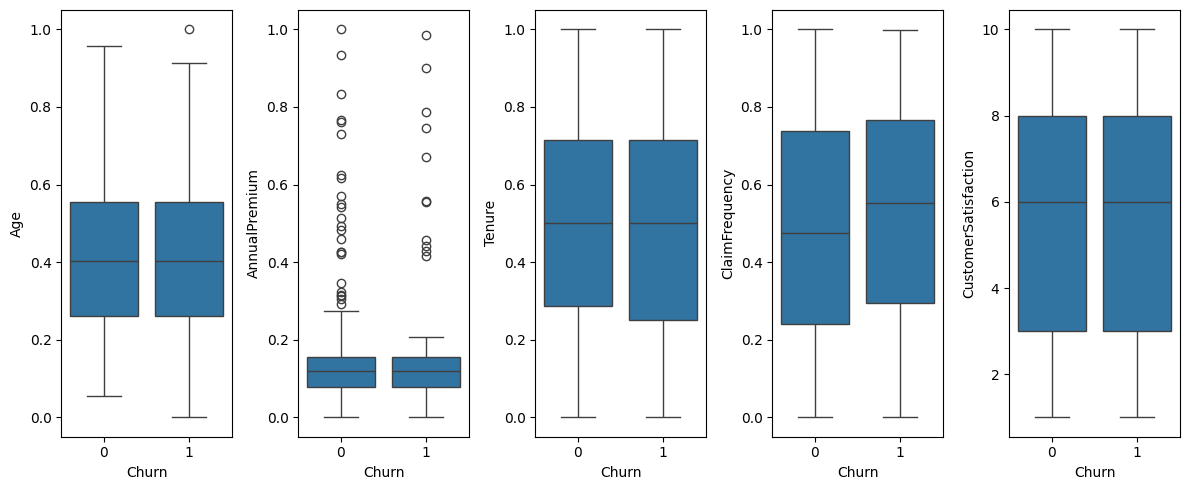

In [103]:
numerical_features = ['Age', 'AnnualPremium', 'Tenure','ClaimFrequency', 'CustomerSatisfaction']
target_colum = 'Churn'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,5))
axs = axs.flatten()

for col, ax in zip(numerical_features, axs.ravel()):
    sns.boxplot(ax=ax, x=target_colum, y=col, data=churn_df)

plt.tight_layout()

[0 1] [3208 1521]


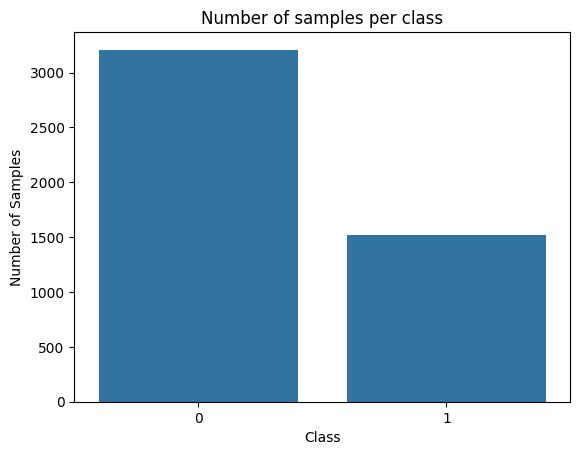

In [105]:
# Determining the spread of sample labels
(unique, counts) = np.unique(churn_df['Churn'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Number of samples per class")
plt.show()

The dataset is unabalanced ~2:1 in favour of the negative label.

# Feature Selection

Drop ID because it has no impact on the result and could confuse the model

In [107]:
churn_df.drop(columns=['CustomerID'], inplace=True)

churn_df.head()

,CustomerSatisfaction,Age,AnnualPremium,Tenure,ClaimFrequency,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_Ontario,Province_Quebec,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Auto,PolicyType_Home,PolicyType_Life,Churn
0,1.0,0.467391,0.115931,0.500000,0.877477,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1.0,0.467391,0.115931,0.500000,0.877477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1.0,0.467391,0.115931,0.464286,0.877477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,1.0,0.467391,0.115931,0.464286,0.877477,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
5,1.0,0.467391,0.115931,0.464286,0.877477,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


# Models

In [108]:
X = churn_df.iloc[:,:-1]
y = churn_df.iloc[:,-1]

print(X[:5])
print(y[:5])

   CustomerSatisfaction       Age  AnnualPremium    Tenure  ClaimFrequency  \
0                   1.0  0.467391       0.115931  0.500000        0.877477   
1                   1.0  0.467391       0.115931  0.500000        0.877477   
3                   1.0  0.467391       0.115931  0.464286        0.877477   
4                   1.0  0.467391       0.115931  0.464286        0.877477   
5                   1.0  0.467391       0.115931  0.464286        0.877477   

   Province_Alberta  Province_British Columbia  Province_Manitoba  \
0               0.0                        0.0                0.0   
1               1.0                        0.0                0.0   
3               1.0                        0.0                0.0   
4               0.0                        0.0                1.0   
5               0.0                        1.0                0.0   

   Province_Ontario  Province_Quebec  MaritalStatus_Divorced  \
0               1.0              0.0                

In [109]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[0 1] [2577 1206]


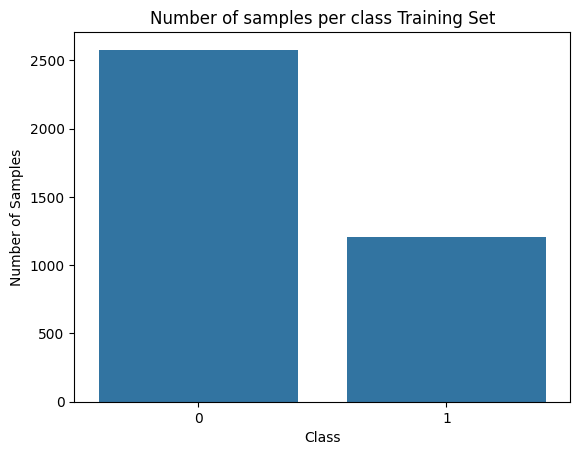

In [110]:
# Determining the spread of labels in the training set
(unique, counts) = np.unique(y_train, return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Number of samples per class Training Set")
plt.show()

## Confusion matrix visualizer

Referenced from :
https://github.com/DTrimarchi10/confusion_matrix?source=post_page-----fc31e3f30fea--------------------------------

To save time

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Testing Multiple Default Models

Pred  {np.int64(0)}
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       631
           1       0.00      0.00      0.00       315

    accuracy                           0.67       946
   macro avg       0.33      0.50      0.40       946
weighted avg       0.44      0.67      0.53       946

ROC_AUC_SCORE is 0.5506603275224511



c:\Users\noah.armsworthy\Anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noah.armsworthy\Anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noah.armsworthy\Anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

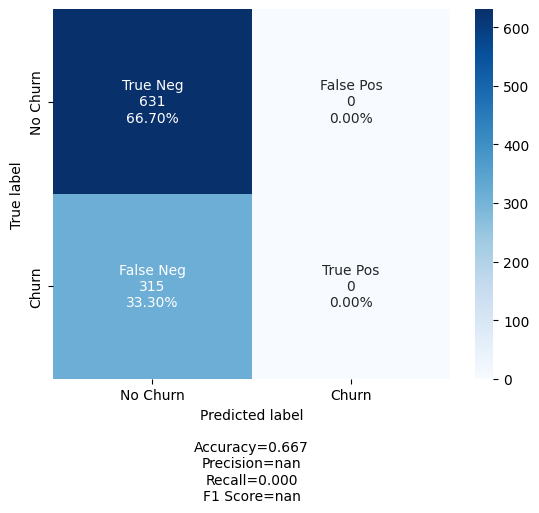

Pred  {np.int64(0)}
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       631
           1       0.00      0.00      0.00       315

    accuracy                           0.67       946
   macro avg       0.33      0.50      0.40       946
weighted avg       0.44      0.67      0.53       946

ROC_AUC_SCORE is 0.5500264131008981



c:\Users\noah.armsworthy\Anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noah.armsworthy\Anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noah.armsworthy\Anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

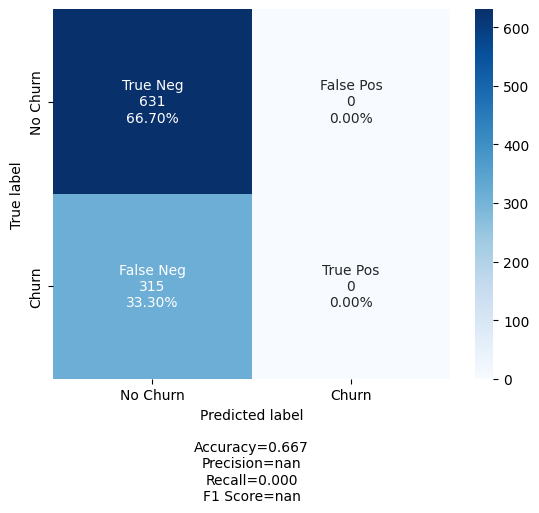

Pred  {np.int64(0), np.int64(1)}
Classification Report: Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       631
           1       0.87      0.82      0.84       315

    accuracy                           0.90       946
   macro avg       0.89      0.88      0.88       946
weighted avg       0.90      0.90      0.90       946

ROC_AUC_SCORE is 0.8786179659396774



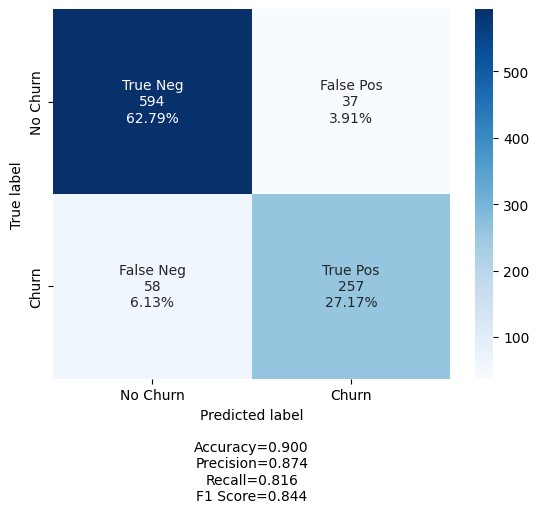

Pred  {np.int64(0), np.int64(1)}
Classification Report: K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       631
           1       0.43      0.25      0.31       315

    accuracy                           0.64       946
   macro avg       0.56      0.54      0.53       946
weighted avg       0.60      0.64      0.61       946

ROC_AUC_SCORE is 0.5774256030991372



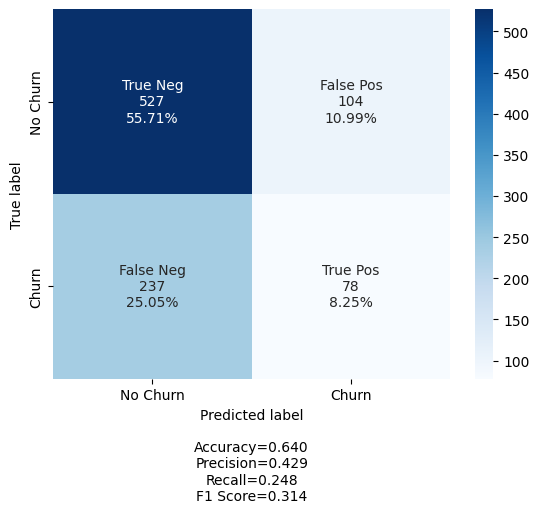

Pred  {np.int64(0), np.int64(1)}
Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       631
           1       0.40      0.03      0.05       315

    accuracy                           0.66       946
   macro avg       0.53      0.50      0.42       946
weighted avg       0.58      0.66      0.55       946

ROC_AUC_SCORE is 0.5393806756722763



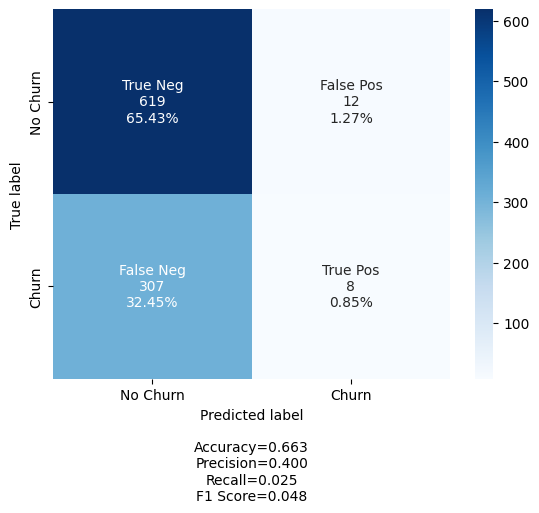

Pred  {np.int64(0), np.int64(1)}
Classification Report: Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       631
           1       1.00      0.78      0.88       315

    accuracy                           0.93       946
   macro avg       0.95      0.89      0.91       946
weighted avg       0.93      0.93      0.92       946

ROC_AUC_SCORE is 0.986637486479008



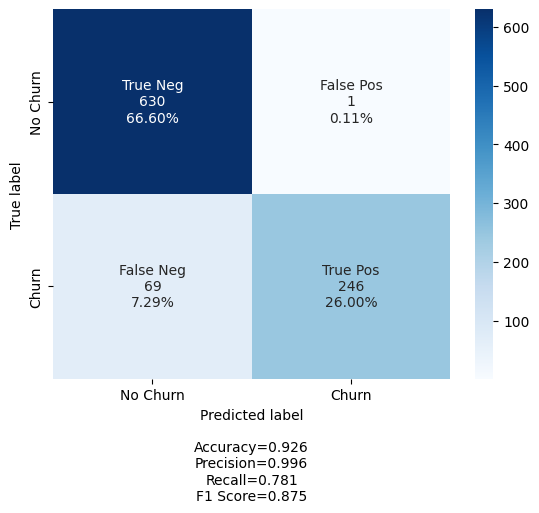

Pred  {np.int64(0), np.int64(1)}
Classification Report: Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.71      0.98      0.83       631
           1       0.87      0.21      0.34       315

    accuracy                           0.73       946
   macro avg       0.79      0.60      0.58       946
weighted avg       0.77      0.73      0.66       946

ROC_AUC_SCORE is 0.8480215329660654



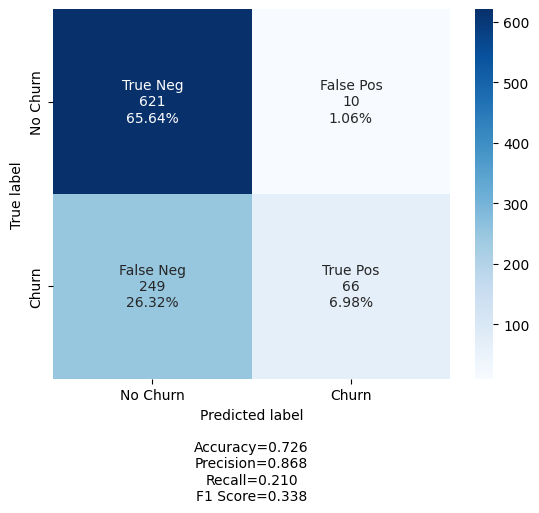

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix, precision_score, recall_score

models = {}

# Logistic Regression
lr_key = "Logistic Regression"
models[lr_key] = LogisticRegression()

svm_key = "Support Vector Machines"
models[svm_key] = CalibratedClassifierCV(LinearSVC()) # For getting probabilities from predictions

dtc_key = "Decision Tree Classifier"
models[dtc_key] = DecisionTreeClassifier()

kn_key = "K-Nearest Neighbor"
models[kn_key] = KNeighborsClassifier()

gnb_key = "Naive Bayes"
models[gnb_key] = GaussianNB()

rfc_key = "Random Forest Classifier"
models[rfc_key] = RandomForestClassifier()

gbc_key = "Gradient Boosting Classifier"
models[gbc_key] = GradientBoostingClassifier()

accuracy, precision, recall, f1, fp_rate, tp_rate, rocauc_score = {}, {}, {}, {}, {}, {}, {}

predict_probs = {}

for key in models.keys():
    models[key].fit(X_train, y_train)

    # Prediction on the test set
    y_prediction = models[key].predict(X_test)
    print('Pred ', set(y_prediction))

    predict_probs[key] = models[key].predict_proba(X_test)[:,1] # Get the estimates for the positive class
        
    # Metrics
    print('Classification Report:',key)
    print(classification_report(y_test, y_prediction))
    # You use the probabilities from the prediction for this curve in order to visualize different thresholds
    # If you just give the predicted value, it will represent only the default 0.5
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_probs[key])

    #print('False positive rate:', false_positive_rate, ' True positive rate:', true_positive_rate)
    #print('Thresholds: ', thresholds)
    #print('ROC_AUC_SCORE is', roc_auc_score(y_test, y_prediction))
    print('ROC_AUC_SCORE is', roc_auc_score(y_test, predict_probs[key]))
    print()
    
    # Storing for later
    accuracy[key] = accuracy_score(y_prediction, y_test)
    precision[key] = precision_score(y_prediction, y_test)
    recall[key] = recall_score(y_prediction, y_test)
    f1[key] = f1_score(y_prediction, y_test)
    fp_rate[key] = false_positive_rate
    tp_rate[key] = true_positive_rate
    rocauc_score[key] = roc_auc_score(y_test, y_prediction)

    '''sns.heatmap(confusion_matrix(Y_test, Y_prediction),fmt='', annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)
    plt.show()'''
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['No Churn', 'Churn']
    make_confusion_matrix(confusion_matrix(y_test, y_prediction),group_names=labels,
                      categories=categories)
    plt.show()

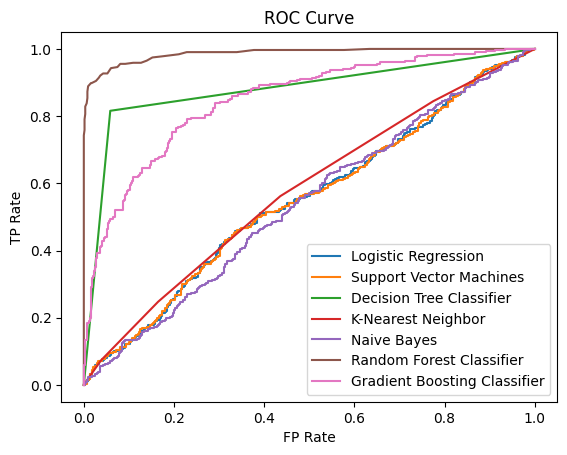

In [117]:
for key,metric in fp_rate.items():
    plt.plot(metric, tp_rate[key], label=key)
    plt.xlabel("FP Rate")
    plt.ylabel("TP Rate")
    plt.title('ROC Curve')
    plt.legend()
plt.show()

Some notes on Decision Tree Classifier:

These models are deterministic.
In this case, we are only given 3 value for this plot

In [118]:
from sklearn import tree
#tree.plot_tree(models[dtc_key]) #Messy and big
print('Leaves:', models[dtc_key].tree_.n_leaves)
print('Leaves and Nodes:', models[dtc_key].tree_.node_count)

Leaves: 498
Leaves and Nodes: 995


## Picking contenders

It's pretty obvious that the Decision Tree Classifier and Random Forest Classifier seemed to perform the best on our data.
They had the highest values in all metrics.

In [119]:
model_df = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score'])
model_df['Accuracy'] = accuracy.values()
model_df['Precision'] = precision.values()
model_df['Recall'] = recall.values()
model_df['F1-Score'] = f1.values()
model_df['ROC AUC Score'] = rocauc_score.values()

# Highlight the two rows with the highest accuracy
top_two_rows = lambda x: ['color:black;background: gold' if x['Accuracy'] in sorted(list(accuracy.values()), reverse=True)[:2] else '' for i in x]
model_df.sort_values(by = ['Accuracy', 'ROC AUC Score'], ascending=False).style.apply(top_two_rows, axis=1)

,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Random Forest Classifier,0.926004,0.780952,0.995951,0.875445,0.889684
Decision Tree Classifier,0.899577,0.815873,0.874150,0.844007,0.878618
Gradient Boosting Classifier,0.726216,0.209524,0.868421,0.337596,0.596838
Logistic Regression,0.667019,0.000000,0.000000,0.000000,0.500000
Support Vector Machines,0.667019,0.000000,0.000000,0.000000,0.500000
Naive Bayes,0.662791,0.025397,0.400000,0.047761,0.503190
K-Nearest Neighbor,0.639535,0.247619,0.428571,0.313883,0.541401


## Metric Analysis

todo: accuracy vs recall, f1, roc auc

## Cross Validation (The final gauntlet)

The top two models from the first checks were the Decision Tree Classifier and the Random Forest Classifier

For our case we are going to use Stratified Cross-Validation: By ensuring that each fold maintains the class distribution of the original dataset, stratified cross-validation reduces the chance of folds with too few minority class samples. This can lead to more consistent results, especially when combined with class weighting.

Using the default method with cv=10 resulted in low accuracy values ~0.50.

I think this could be due to:
1. Small dataset
2. Label Imbalance
3. Data leakage

The sampling from the default method could be pulling very low amounts of positive labelled samples because of the imbalance.

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Needed to ensure that each fold maintains the same proportion of class 0 and 1 as the dataset
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=64)

# Decision Tree Classifier
# This method will fit the model multiple times so we want to use the training set only
cv_score_dtc = cross_val_score(models[dtc_key], X_train, y_train, cv=cv)
title1= "Decision Tree CV Accuracy Scores"
print(title1)
print("-" * len(title1))
print(cv_score_dtc)
print('Average: ', np.average(cv_score_dtc))
print('Standard Deviation: ', np.std(cv_score_dtc))
print()

# Random Forest Classifier
cv_score_rfc = cross_val_score(models[rfc_key], X_train, y_train, cv=cv)
title2 = "Random Forest CV Accuracy Scores"
print(title2)
print("-" * len(title2))
print(cv_score_rfc)
print('Average: ', np.average(cv_score_rfc))
print('Standard Deviation: ', np.std(cv_score_rfc))

Decision Tree CV Scores
-----------------------
[0.93403694 0.89182058 0.89182058 0.86243386 0.93915344 0.92063492
 0.9047619  0.87566138 0.8994709  0.8968254  0.91029024 0.92348285
 0.88654354 0.8968254  0.88624339 0.88624339 0.88095238 0.9047619
 0.9021164  0.86772487 0.88390501 0.8944591  0.91029024 0.91005291
 0.87566138 0.85978836 0.8994709  0.86507937 0.9047619  0.87037037]
Average:  0.894521459517062
Standard Deviation:  0.019893289765298833

Random Forest CV Scores
-----------------------
[0.90501319 0.91292876 0.89973615 0.91269841 0.92063492 0.91534392
 0.93915344 0.9021164  0.94444444 0.8968254  0.92348285 0.9182058
 0.91029024 0.91005291 0.90740741 0.92328042 0.92328042 0.91798942
 0.91269841 0.9047619  0.92348285 0.91292876 0.90501319 0.92857143
 0.92063492 0.90740741 0.91269841 0.88888889 0.90740741 0.9021164 ]
Average:  0.913649816420265
Standard Deviation:  0.011646415241638284


The above method will use accuracy as its target metric, and both models are still very close.

However, I think in our case we very much want to prioritize getting the positive (Customer did Churn) samples correct.
For this, the best metric to look at is recall:

$$
Recall = \frac{True Positives}{True Positives + False Negatives}
$$

Meaning when the positive case came up, how often did we guess it correctly?

In [121]:
# What about recall?
# Decision Tree Classifier
cv_score_dtc = cross_val_score(models[dtc_key], X_train, y_train, cv=cv, scoring='recall')
title1= "Decision Tree CV Recall Scores"
print(title1)
print("-" * len(title1))
print(cv_score_dtc)
print('Average: ', np.average(cv_score_dtc))
print('Standard Deviation: ', np.std(cv_score_dtc))
print()

# Random Forest Classifier
cv_score_rfc = cross_val_score(models[rfc_key], X_train, y_train, cv=cv, scoring='recall')
title2 = "Random Forest CV Recall Scores"
print(title2)
print("-" * len(title2))
print(cv_score_rfc)
print('Average: ', np.average(cv_score_rfc))
print('Standard Deviation: ', np.std(cv_score_rfc))

Decision Tree CV Scores
-----------------------
[0.89256198 0.80165289 0.85123967 0.84166667 0.89166667 0.83333333
 0.875      0.82644628 0.87603306 0.79338843 0.89256198 0.8677686
 0.82644628 0.85833333 0.84166667 0.86666667 0.83333333 0.90082645
 0.85950413 0.79338843 0.82644628 0.81818182 0.84297521 0.86666667
 0.79166667 0.8        0.8        0.76859504 0.85123967 0.78512397]
Average:  0.839146005509642
Standard Deviation:  0.03566099741719771
Random Forest CV Scores
-----------------------
[0.68595041 0.78512397 0.72727273 0.70833333 0.75833333 0.725
 0.85       0.7107438  0.87603306 0.72727273 0.76033058 0.72727273
 0.7107438  0.78333333 0.775      0.75833333 0.76666667 0.73553719
 0.78512397 0.69421488 0.76033058 0.74380165 0.74380165 0.8
 0.76666667 0.75       0.75       0.69421488 0.73553719 0.70247934]
Average:  0.7499150596877868
Standard Deviation:  0.04225636140237538


## Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

def check_feature_important(model, X_test, y_test):
    #feature_names = X_train.columns
    # Reducing the names for better readability
    feature_names = ['Satisfaction', 'Age', 'AnnualPremium', 'Tenure',
       'ClaimFrequency', 'Alberta', 'British Columbia',
       'Manitoba', 'Ontario', 'Quebec',
        'Divorced', 'Married',
       'Single', 'Auto', 'Home',
      'Life']

    importance_df = pd.DataFrame( {
        'Feature': feature_names,
        'Importance': model.feature_importances_
    })
    importance_df = importance_df.sort_values(by='Importance')
    #print("Feature Importance")
    #print(importance_df)
    plt.figure(figsize=(10,6))
    plt.title("Feature Importance")
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.show()
    print()

    # Perform permutation importance
    permutation_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Access the feature importance
    importances = permutation_result.importances_mean
    stds = permutation_result.importances_std

    # Create DataFrame
    permutation_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Std Dev': stds
    }).sort_values(by='Importance').round(5)

    #print("Permutation Importance ")
    #print(permutation_importance_df)
    plt.figure(figsize=(10,6))
    plt.title("Permutation Importance")
    plt.barh(permutation_importance_df['Feature'], permutation_importance_df['Importance'])
    plt.show()
    print()


Decision Tree


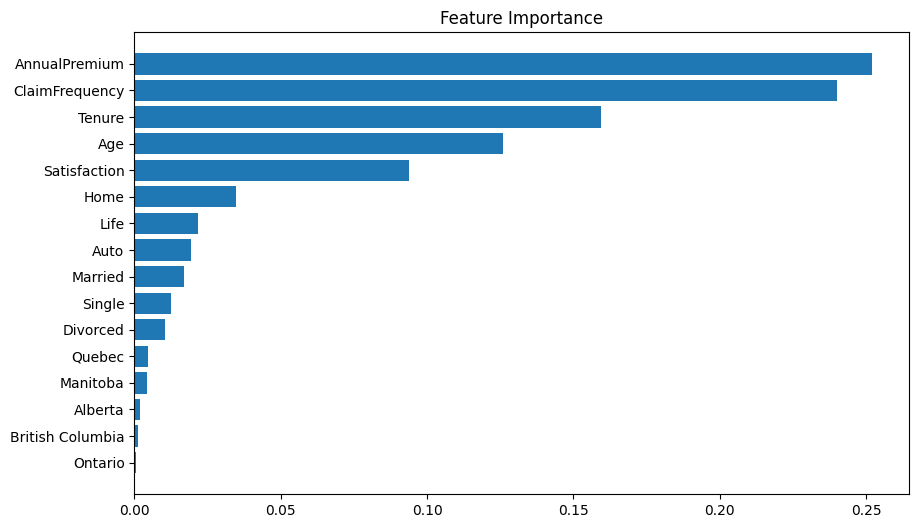

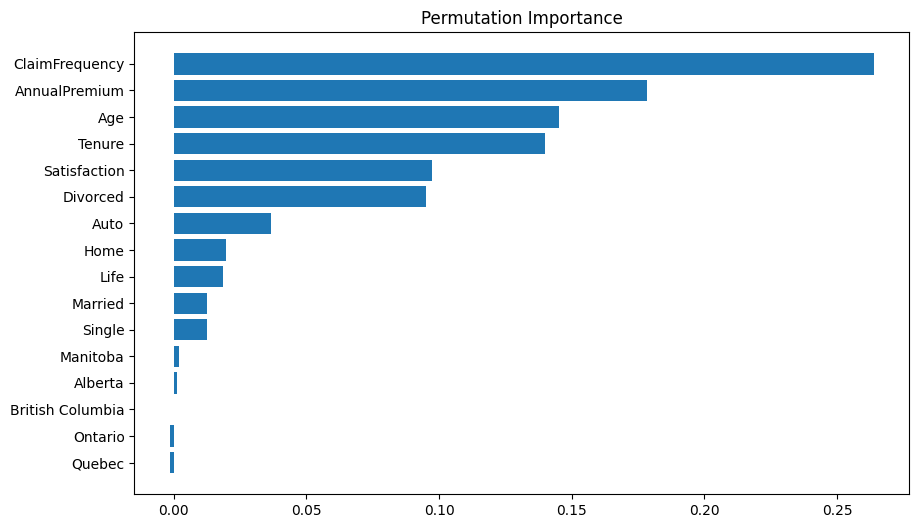


Random Forest


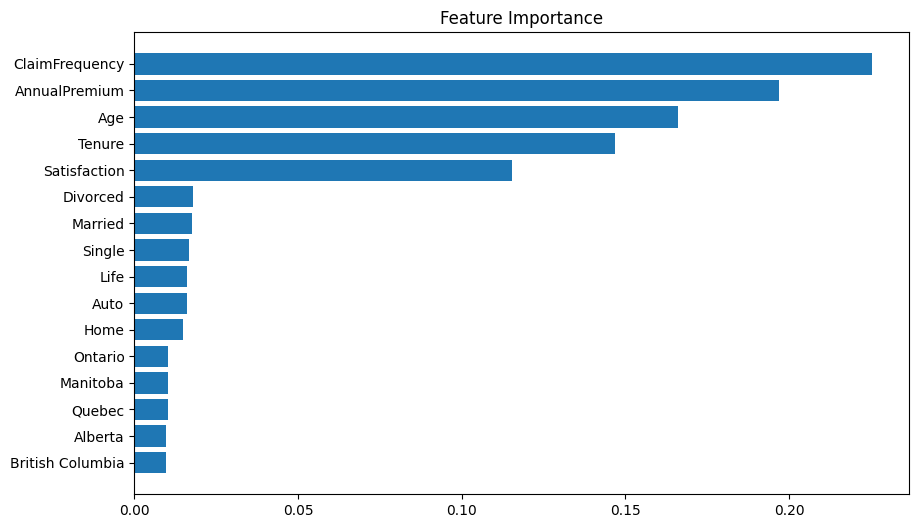

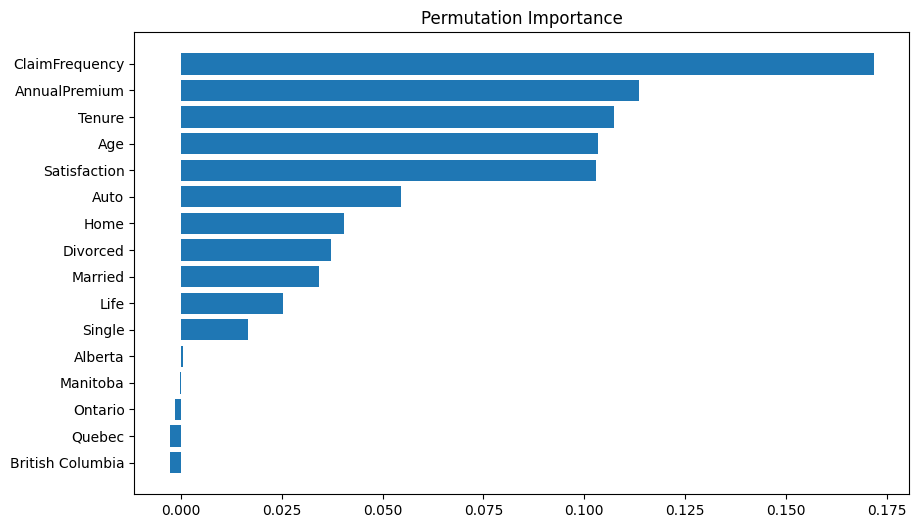

In [124]:
# Feature importance
# Decision Tree Classifier
print("Decision Tree")
check_feature_important(models[dtc_key], X_test, y_test)

# Random Forest Classifier
print("Random Forest")
check_feature_important(models[rfc_key], X_test, y_test)

Negative importance means that when it was shuffled, the performance improved rather than expected worsened.
This could be indicitive of a noisy or irrelevant feature.

In both cases it appears these 5 features are the important ones:
- ClaimFrequency
- AnnualPremium
- Age
- Tenure
- CustomerSatisfaction

# Final Model Training

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

def PrepareChurnData(df):
    # Deal with Age outlier
    outlier_age_low_customer_ids = df[(df['Age'] < 18)]['CustomerID'].to_list()
    outlier_age_high_customer_ids = df[(df['Age'] >= 105)]['CustomerID'].to_list()
    valid_ages_min = df[df['CustomerID'].isin(outlier_age_high_customer_ids)].groupby('CustomerID')['Age'].transform('min')
    valid_ages_max = df[df['CustomerID'].isin(outlier_age_low_customer_ids)].groupby('CustomerID')['Age'].transform('max')
    # Identify the valid ages & replace them with duplicate record value
    valid_ages = pd.concat([valid_ages_min, valid_ages_max])
    # row.name represents index https://stackoverflow.com/questions/26658240/getting-the-index-of-a-row-in-a-pandas-apply-function
    df['Age'] = df.apply(lambda row: valid_ages[row.name] if row['Age'] >= 105 or row['Age'] < 18 else row['Age'], axis=1)

    # Impute missing numerical cols
    numerical_features = ['Age', 'AnnualPremium', 'Tenure', 'ClaimFrequency', 'CustomerSatisfaction'] # Still not sure about cus satisfaction here
    imputer = SimpleImputer(strategy='mode')
    df[numerical_features] = imputer.fit_transform(df[numerical_features])

    # Drop Duplicates
    df.dropna(inplace=True)

    # Scale numerical columns
    min_max_scaler = MinMaxScaler()
    scaled_df = df[numerical_features]
    scaled_df = min_max_scaler.fit_transform(scaled_df)
    # Need to specify the same index values as the data in order to concat later without introducing nan values
    scaled_df = pd.DataFrame(scaled_df, columns = numerical_features, index=df.index)
    # Drop the old continuous values
    df.drop(columns=numerical_features, inplace=True)
    # Add in the normalized ones
    df = pd.concat([df, scaled_df], axis=1)

    # One-hot encode categorical labels
    categorical_features = ['Province', 'MaritalStatus', 'PolicyType']
    onehot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
    # Concat the one hot columns
    for col in categorical_features:
        # First fit to the OneHot encoder
        onehot = onehot_encoder.fit_transform(df[[col]])
        # Add the new columns and remove the old categorical one
        df = pd.concat([df, onehot], axis=1).drop(columns=[col])

    # Remove Customer ID now that it's no longer used for duplicate identification and not relevant to the target
    df.drop('CustomerID', axis=1, inplace=True)

    # Finally, Moving the label column to the end
    label = df.pop("Churn")
    df[label.name] = label

    return df

In [41]:
churn_df = pd.read_excel("Churn_Dataset.xlsx")
churn_df = PrepareChurnData(churn_df)

churn_df.head()

,Age,AnnualPremium,Tenure,ClaimFrequency,CustomerSatisfaction,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_Ontario,Province_Quebec,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Auto,PolicyType_Home,PolicyType_Life,Churn
0,0.457831,0.115931,0.500000,0.877477,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.457831,0.115931,0.500000,0.877477,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0.457831,0.115931,0.500000,0.877477,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.457831,0.115931,0.464286,0.877477,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0.457831,0.115931,0.464286,0.877477,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [42]:
X = churn_df.iloc[:,:-1] # Exclude Churn the target column
y = churn_df.iloc[:,-1]

print(X[:5])
print(y[:5])

        Age  AnnualPremium    Tenure  ClaimFrequency  CustomerSatisfaction  \
0  0.457831       0.115931  0.500000        0.877477                   0.0   
1  0.457831       0.115931  0.500000        0.877477                   0.0   
2  0.457831       0.115931  0.500000        0.877477                   0.0   
3  0.457831       0.115931  0.464286        0.877477                   0.0   
4  0.457831       0.115931  0.464286        0.877477                   0.0   

   Province_Alberta  Province_British Columbia  Province_Manitoba  \
0               0.0                        0.0                0.0   
1               1.0                        0.0                0.0   
2               0.0                        0.0                0.0   
3               1.0                        0.0                0.0   
4               0.0                        0.0                1.0   

   Province_Ontario  Province_Quebec  MaritalStatus_Divorced  \
0               1.0              0.0                

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

## Training Model with Default Parameters

In [45]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix, precision_score, recall_score

def fit_and_report(model, X_train, y_train, X_test, y_test):    
    model.fit(X_train, y_train)

    # Prediction on the test set
    y_prediction = model.predict(X_test)

    predict_probs = model.predict_proba(X_test)[:,1] # Get the estimates for the positive class
        
    # Metrics
    print('Classification Report:')
    print(classification_report(y_test, y_prediction))
    # You use the probabilities from the prediction for this curve in order to visualize different thresholds
    # If you just give the predicted value, it will represent only the default 0.5
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_probs)
    #print('ROC_AUC_SCORE is', roc_auc_score(y_test, predict_probs))
    #print()

    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['No Churn', 'Churn']
    make_confusion_matrix(confusion_matrix(y_test, y_prediction),group_names=labels,
                      categories=categories)
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       790
           1       0.87      0.87      0.87       410

    accuracy                           0.91      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.91      0.91      0.91      1200



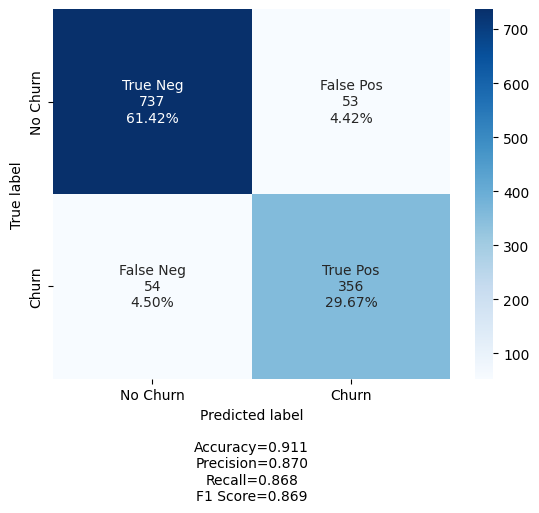

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit_and_report(clf, X_train, y_train, X_test, y_test)

Tree depth:  28
Number of leaves:  508


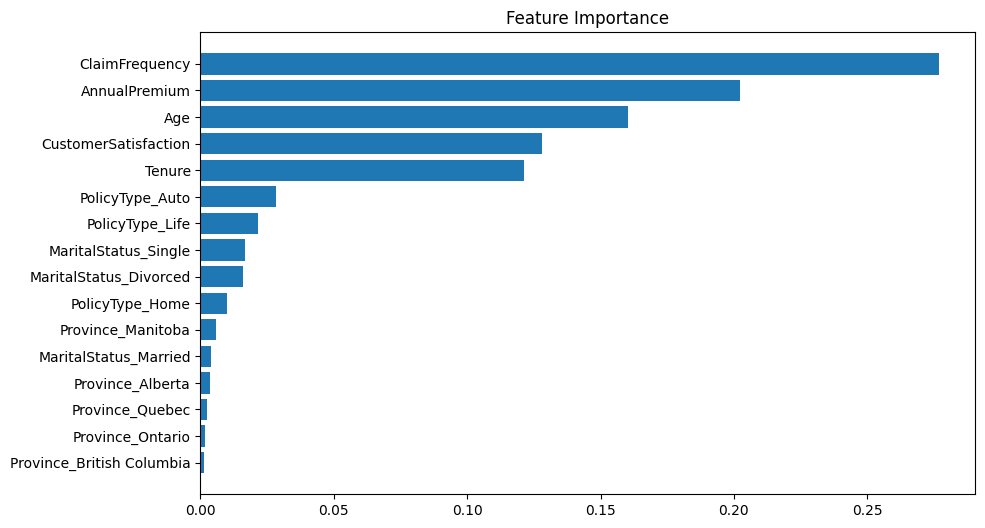

In [54]:
print('Tree depth: ',clf.get_depth())
print('Number of leaves: ',clf.get_n_leaves())

feature_names = X_train.columns
importance_df = pd.DataFrame( { 
    'Feature': feature_names,
    'Importance': clf.feature_importances_
})
importance_df = importance_df.sort_values(by='Importance')
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.show()

## Hyper Parameter Tuning

Using GridSearchCV to find optimal hyperparameters

## Decision Tree

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# This will default to accuracy
# Decision Tree
# Define hyperparameters to tune
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 3, 5, 'sqrt', 'log2'],
    'class_weight': [{0:2, 1:1}, {0:1.5, 1:1}, {0:1, 1:1}, {0:1, 1:1.5}, {0:1, 1:2}]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=64)
# Perform Grid Search. Note: By default, this method re-fits the model with the best parameters
grid_search_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation Score:", grid_search_dt.best_score_)

Best Parameters: {'class_weight': {0: 1, 1: 1.5}, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8976480700053797


Accuracy: 0.9108333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       790
           1       0.87      0.87      0.87       410

    accuracy                           0.91      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.91      0.91      0.91      1200



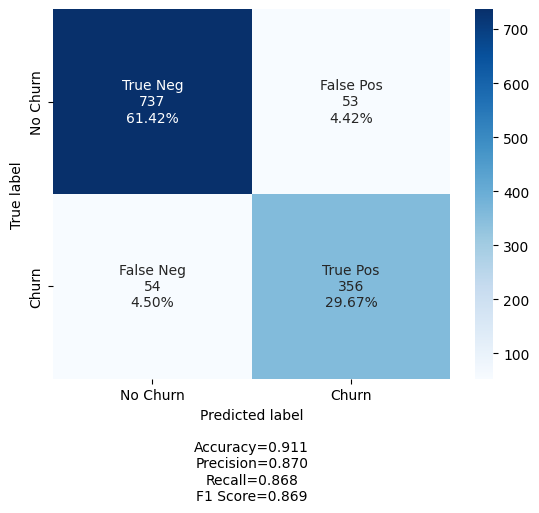

In [56]:
y_pred = clf.predict(X_test)
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No Churn', 'Churn']
make_confusion_matrix(confusion_matrix(y_test, y_pred),group_names=labels,
                    categories=categories)

In [57]:
import pickle
# Saving the model
filename = 'churn_tree_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

# To load the model
#clf = pickle.load(open(filename, 'rb'))

## Bonus Content: Investigating tree structure

Unfortunately the tree model I ended up with is a bit tough to visualize.

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

In [58]:
len(X_test)

1200

In [59]:
# You can enter any index of the test set above to see its traversal and prediction/true label.
sample_id = 64

X_test_reset_index = X_test.reset_index(drop=True)
y_test_reset_index = y_test.reset_index(drop=True)

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_indicator = clf.decision_path(X_test_reset_index)
leaf_id = clf.apply(X_test_reset_index)

# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            #feature=feature[node_id],
            feature=X_test_reset_index.columns[feature[node_id]],
            value=X_test.iloc[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

y_pred = clf.predict(X_test_reset_index)
print('Predicted label:', y_pred[sample_id], 'Actual label:', y_test_reset_index[sample_id])


Rules used to predict sample 64:

decision node 0 : (X_test[64, ClaimFrequency] = 0.8452433948818938) > 0.41488558053970337)
decision node 412 : (X_test[64, MaritalStatus_Divorced] = 0.0) <= 0.5)
decision node 413 : (X_test[64, ClaimFrequency] = 0.8452433948818938) > 0.4341046065092087)
decision node 423 : (X_test[64, Age] = 0.3855421686746988) > 0.13855421543121338)
decision node 453 : (X_test[64, Tenure] = 0.9642857142857143) > 0.4821428507566452)
decision node 615 : (X_test[64, MaritalStatus_Single] = 1.0) > 0.5)
decision node 711 : (X_test[64, AnnualPremium] = 0.12305926998013725) <= 0.20093411952257156)
decision node 712 : (X_test[64, CustomerSatisfaction] = 0.8888888888888888) <= 0.9444444477558136)
decision node 713 : (X_test[64, Age] = 0.3855421686746988) <= 0.7168674767017365)
decision node 714 : (X_test[64, Tenure] = 0.9642857142857143) > 0.6607142686843872)
decision node 760 : (X_test[64, AnnualPremium] = 0.12305926998013725) > 0.11933553591370583)
decision node 778 : (X_tes

In [ ]:
# Will display Chaos
from sklearn import tree

fn=X.columns
cn= ['No Churn', 'Churn']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=800)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               fontsize=2)

# References used


1. https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
2. https://besjournals.onlinelibrary.wiley.com/doi/10.1111/j.2041-210X.2009.00001.x
3. https://engineeringfordatascience.com/posts/matplotlib_subplots/
4. https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
5. https://www.geeksforgeeks.org/difference-between-random-forest-and-decision-tree/
6. https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
7. https://scikit-learn.org/stable/modules/preprocessing.html
8. https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e
9. https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9
10. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
11. https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
12. https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
13. https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/
14. https://stats.stackexchange.com/questions/28029/training-a-decision-tree-against-unbalanced-data
15. https://stats.stackexchange.com/questions/312780/why-is-accuracy-not-the-best-measure-for-assessing-classification-models
16. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html